In [4]:
import numpy as np
import xarray as xr

In [5]:
reflectanceFilePath = '../data/EMIT_L2A_RFL_001_20220811T001233_2222216_001.nc'

In [6]:
refl = xr.open_dataset(reflectanceFilePath)

In [7]:
wvl = xr.open_dataset(reflectanceFilePath,group='sensor_band_parameters')
wvl

<xarray.Dataset>
Dimensions:           (bands: 285)
Dimensions without coordinates: bands
Data variables:
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...

In [8]:
ds = refl.assign_coords({'downtrack':(['downtrack'], refl.downtrack.data),'crosstrack':(['crosstrack'],refl.crosstrack.data), **wvl.variables}) # This will utilize the wvl dataset dictionary as the ds coordinates dictionary
ds

<xarray.Dataset>
Dimensions:           (downtrack: 1280, crosstrack: 1242, bands: 285)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...
Dimensions without coordinates: bands
Data variables:
    reflectance       (downtrack, crosstrack, bands) float32 ...
Attributes: (12/37)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             40.221942365979395
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.2083354e+02  5.4223252e-04 -0.0000...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [9]:
b560 = np.nanargmin(abs(ds['wavelengths'].values-560)) # Find band nearest to value of 560 nm (green)
b850 = np.nanargmin(abs(ds['wavelengths'].values-850)) # Find band nearest to value of 850 nm (NIR)

In [10]:
data560 = ds.sel(bands=b560)['reflectance'].values
data850 = ds.sel(bands=b850)['reflectance'].values

In [11]:
# Calculate ndwi
ndwi = (data560 - data850) / (data560 + data850)
ndwi

array([[-0.6447732 , -0.63647205, -0.5943405 , ..., -0.61265856,
        -0.6229411 , -0.62332666],
       [-0.5177732 , -0.48485276, -0.4945201 , ..., -0.581717  ,
        -0.6327658 , -0.6420767 ],
       [-0.48614797, -0.49306762, -0.5401799 , ..., -0.62413514,
        -0.6461642 , -0.6463945 ],
       ...,
       [-0.3298203 , -0.35616904, -0.3500611 , ..., -0.2366941 ,
        -0.24370725, -0.23606126],
       [-0.3430034 , -0.35590857, -0.36756665, ..., -0.26483855,
        -0.23811129, -0.2529189 ],
       [-0.35121965, -0.35921764, -0.36136875, ..., -0.25823718,
        -0.24533859, -0.23218839]], dtype=float32)

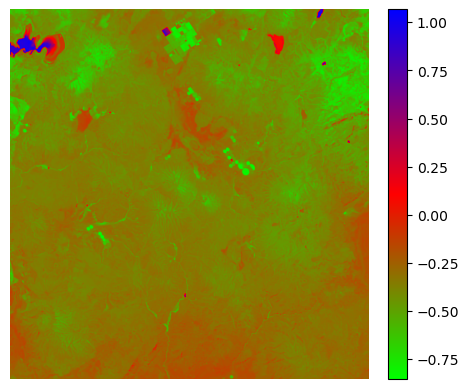

In [13]:
import matplotlib.pyplot as plt
plot = plt.imshow(ndwi, cmap=plt.cm.brg_r)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)